### Titanic Survival - Exploratory Data Analysis
This is the legendary Titanic ML competition dataset – the best, first challenge to dive into ML competitions.  
  
The competition is simple: in which we need to create a model that predicts which passengers survived the Titanic shipwreck.  
  
Before creating the model, it is mandatory step to analyze and explore the given data. This will help use to understand the data and figure out relations between the fields provided.

In [243]:
# Import required libaries
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-processing
from sklearn.preprocessing import LabelEncoder

In [38]:
# Basic Layout details of Visualizations
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'legend.loc':'upper right',
          'figure.figsize': (15, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [167]:
# Read the train and test set
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [142]:
# Have a glance at data in both the files
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Check shape of both the files
print('Train Set: {} \nTest Set: {}'.format(df_train.shape, df_test.shape))

Train Set: (891, 12) 
Test Set: (418, 11)


Let us get the overview of the dataset

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check Data Type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


From here we can see that the data is either int, float or object and no date or time variables.  
Also, there are many missing values in data, so let's check the data for each field.

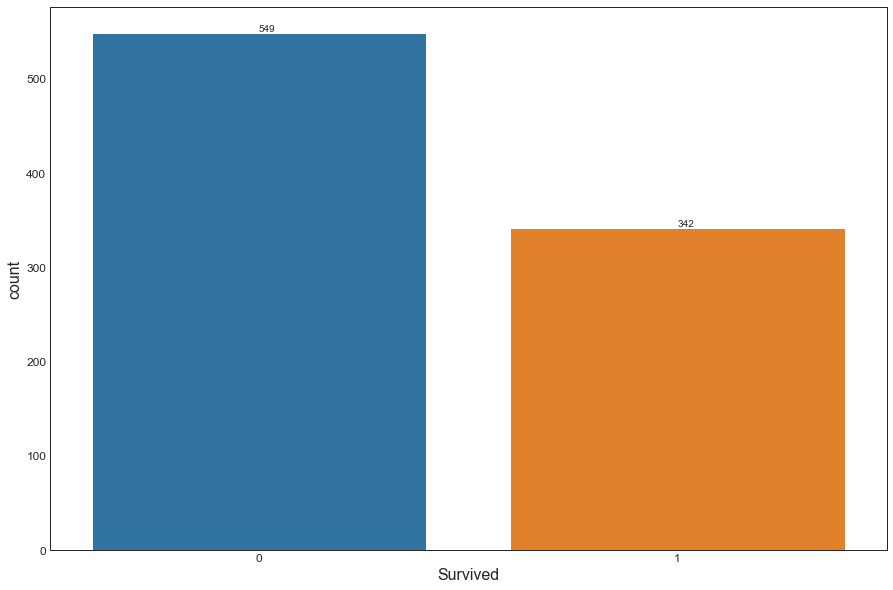

In [45]:
# Check the Survival Rate in train set
ax = sns.countplot(df_train['Survived'])

# Adding annotations 
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(round(height,2)), (x + width/2, y + height + 1))

plt.show()

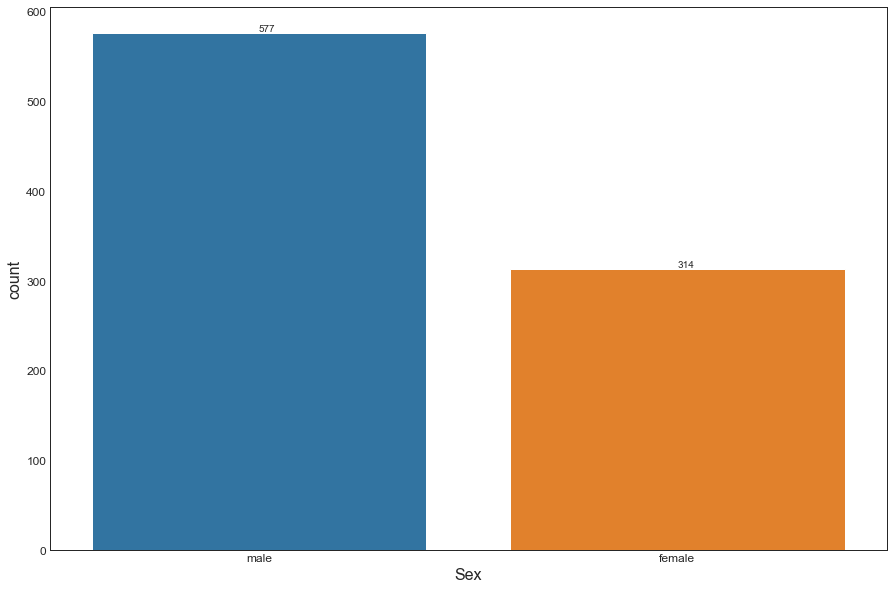

In [44]:
# Check gender ratio of passengers on Ship
ax = sns.countplot(df_train['Sex'])

# Adding annotations 
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(round(height,2)), (x + width/2, y + height + 1))

plt.show()

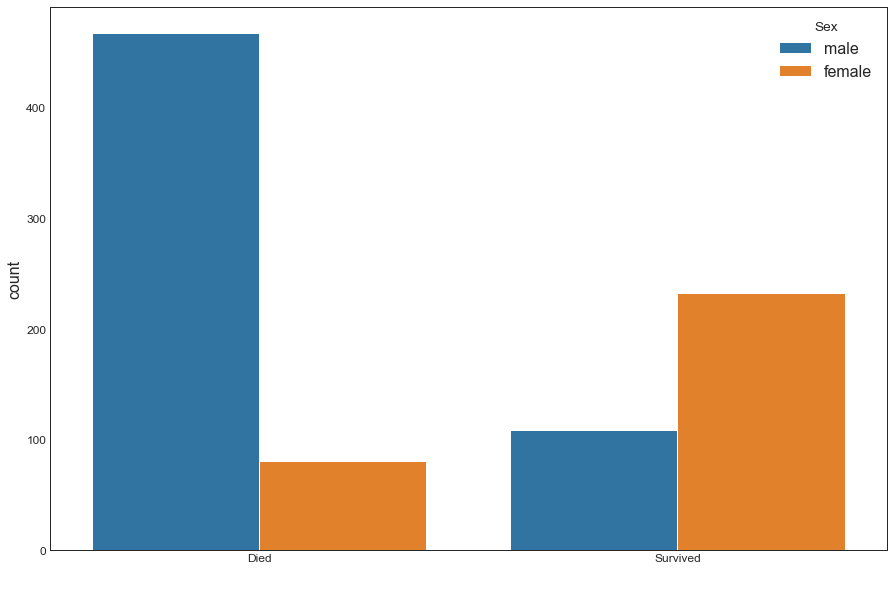

In [46]:
# Let's check which gender survived the most
sns.countplot(df_train['Survived'], hue=df_train['Sex'])
plt.xticks(ticks=df_train['Survived'].unique(), labels=['Died', 'Survived'])
plt.xlabel(' ')
plt.show()

Here, we can see that majority people who died are **men**.   
Let us have a look at the age category of the passengers onboard.

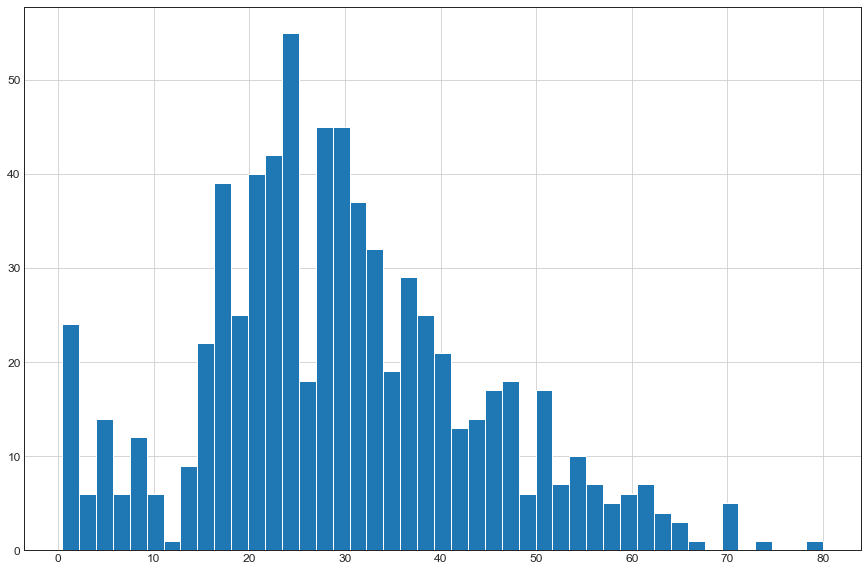

In [20]:
# Age Category
df_train['Age'].hist(bins=45)

We can say that most of the passenger are young i.e. in between 15 to 30.    
Let us check how many groups or families we have on ship. This can be checked by the fields **SibSp** & **Parch**. This will let us know how many people were accompained with a passenger.

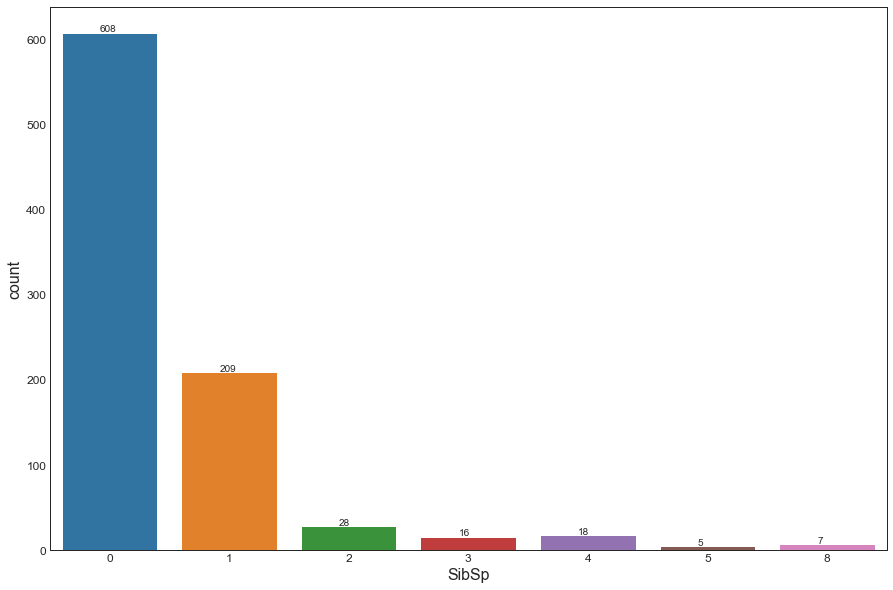

In [40]:
# Check number of Siblings or Spouse with the passenger
ax = sns.countplot(df_train['SibSp'])

# Adding annotations 
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(round(height,2)), (x + width/2.5, y + height + 1))
    
plt.show()

Above Graph tells that most of the passengers we travelling alone and hardly few with more than 2 Siblings or Spouse.

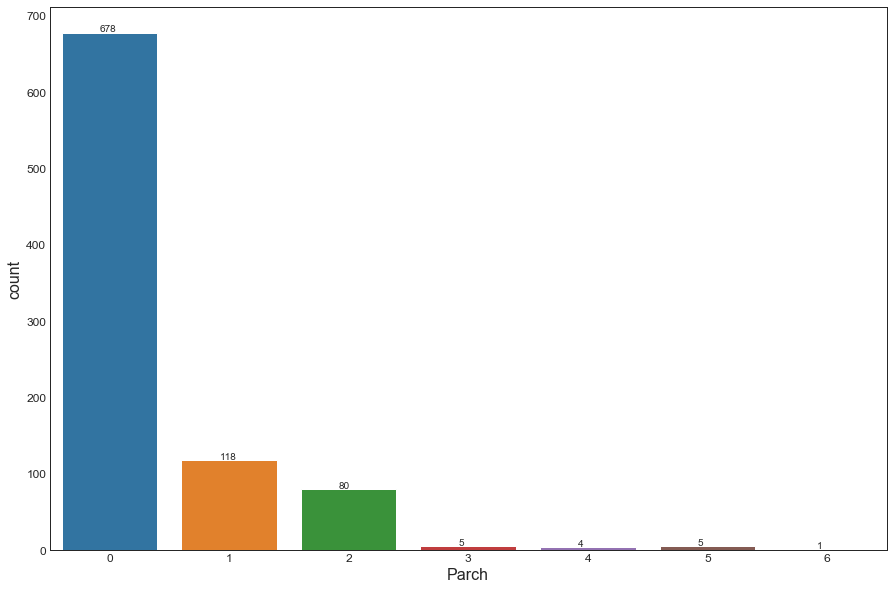

In [29]:
# Check if passenger is with Parent or Children
ax = sns.countplot(df_train['Parch'])

# Adding annotations 
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(round(height,2)), (x + width/2.5, y + height + 1))
    
plt.show()

Again, the count of people without any Parent or children along are very high and hardly 1 passenger with family of 7, including that passenger.  
  
Let us also check their Survival rate.

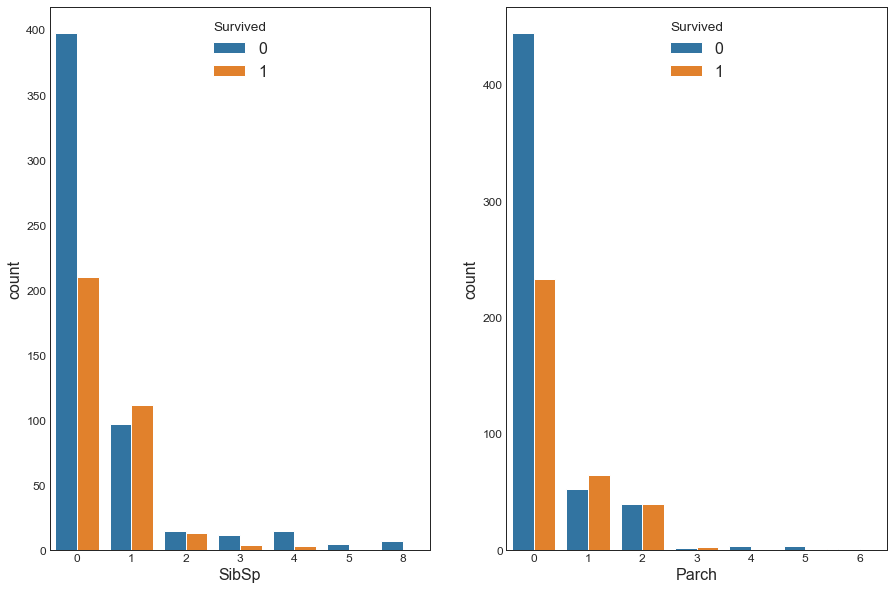

In [39]:
fig,axes = plt.subplots(1,2)

# Passengers with Siblings or Spouse
sns.countplot(df_train['SibSp'], hue=df_train['Survived'], ax=axes[0])

# Passengers with Parents or Children
sns.countplot(df_train['Parch'], hue=df_train['Survived'], ax=axes[1])

plt.show()

Here, we can see that the passengers with more than 4 Siblings or Spouse did not survied at all.  
Also, passengers with Parent or Children more that 3 did not Survived.  
  
In both the cases, passengers who were travelling alone died as well as survived more than the passengers who were accompanied.  
  
Let us check Survival rate of the passenger with respect to the **Passenger Class**, where  
Passenger Class 1 --> High Class   
Passenger Class 3 --> Low Class.

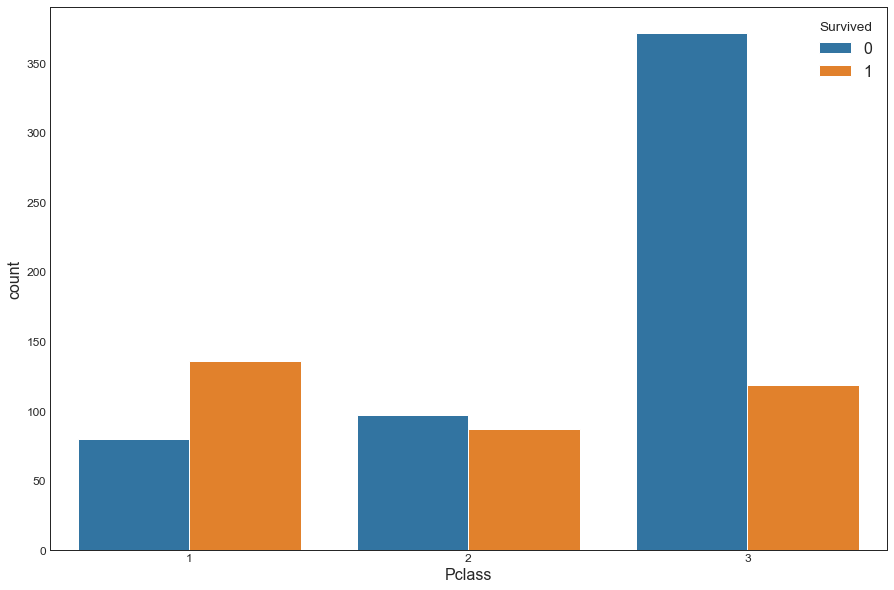

In [48]:
sns.countplot(df_train['Pclass'], hue=df_train['Survived'])
plt.show()

From this we can see that the Passengers from Class 1 survived the most and the one with Class 3 died the most.  
Definitely, the evacuation priority must have been given to the higher class passenger, who must have paid more than the others.  
  
Let us check the ticket fare distribution.

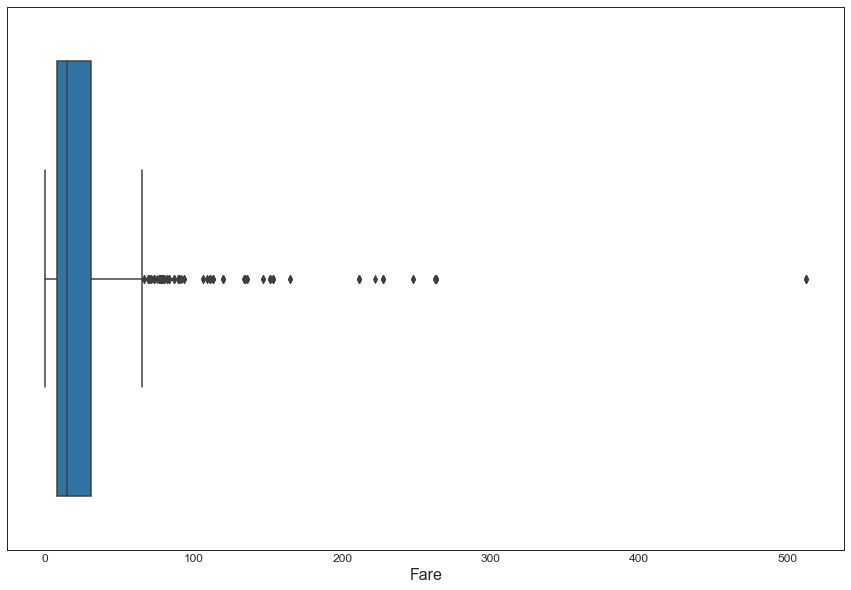

In [54]:
sns.boxplot(df_train['Fare'])
plt.show()

If we consider that the Fare was in US dollars, then most of the tickets were in price range from $10 to $80 approx.  
Definitely we have some outliers, where we can assume that these must be the combined price ticket of the passengers who have big families along with them.  
Let us check if these fare prices can tell us something about the Survival rate.

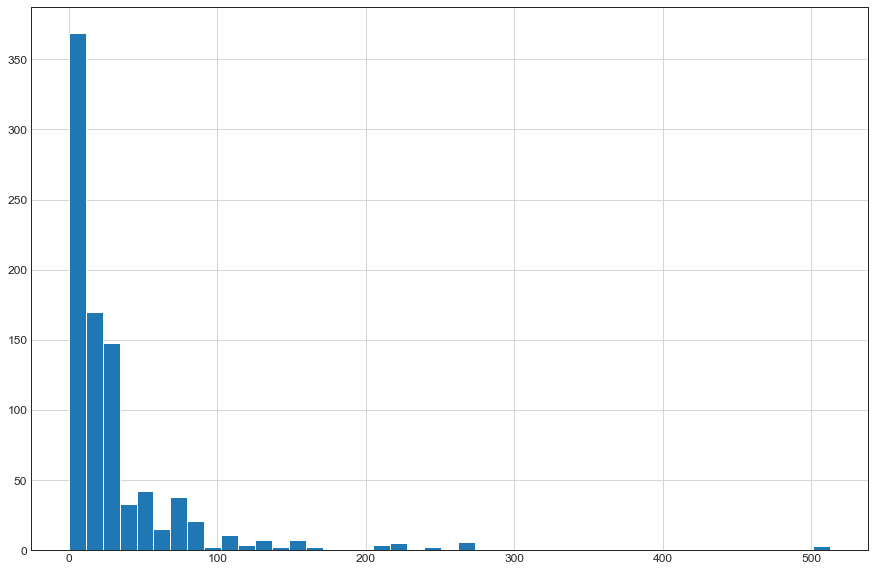

In [214]:
df_train['Fare'].hist(bins=45)
plt.show()

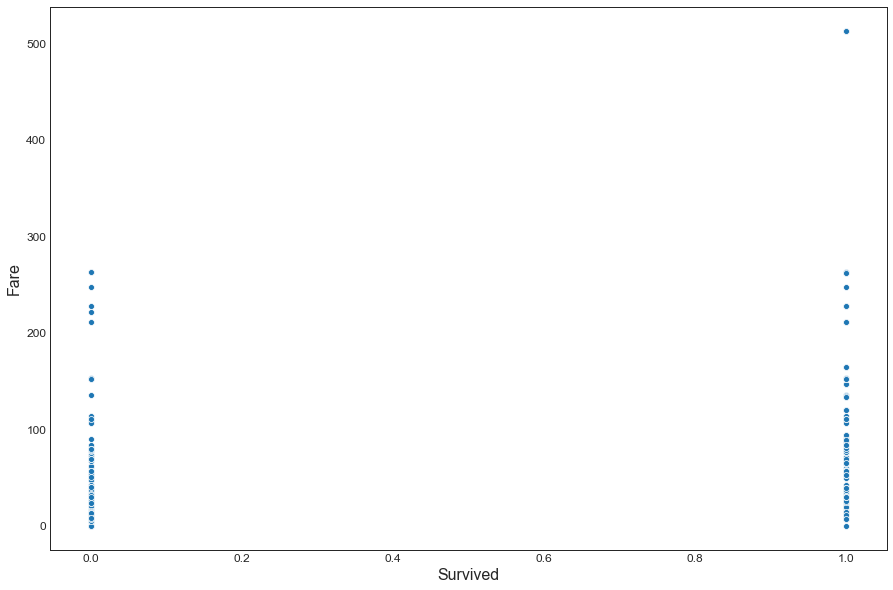

In [59]:
sns.scatterplot(df_train['Survived'], df_train['Fare'])
plt.show()

Here, the outlier, we identified in previous plot seems to be Survived. But, we cannot use only fare to predict the Survival rate.  
Let us also check the power of having Cabin on ship and will it helps passenger to get priority in evacuation process.

In [75]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We can see that we have null values in this field i.e. for some passengers the Cabin is not allocated.  
Let us check the count of such passengers.

In [76]:
df_train['Cabin'].isnull().sum()

687

Out of **891** passengers, **687** passengers do not have Cabin allocated. Let us check if such passengers survived or not.

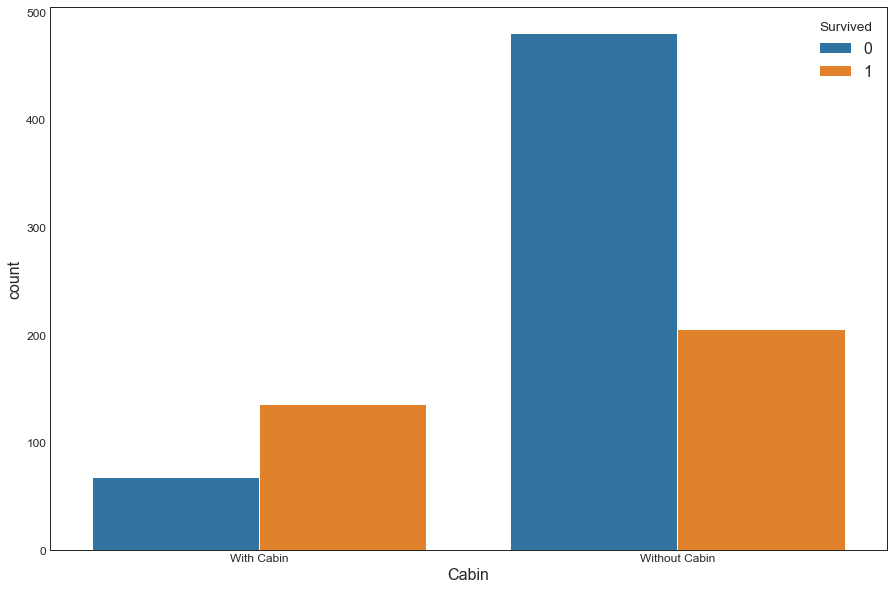

In [81]:
sns.countplot(df_train['Cabin'].isnull(), hue=df_train['Survived'])
plt.xticks(df_train['Cabin'].isnull().unique(), ['Without Cabin', 'With Cabin'])

plt.show()

In above graph, we can say that the Passengers without Cabin could not Survived, but the passengers with Cabin Survived more.  
  
We have one more field called **'Embarked'** which tells us from which station the passenger boarded the Ship.  
Let us also check the Survival Rate based on this field.  

In [79]:
df_train['Cabin'].isnull().unique()

array([ True, False])

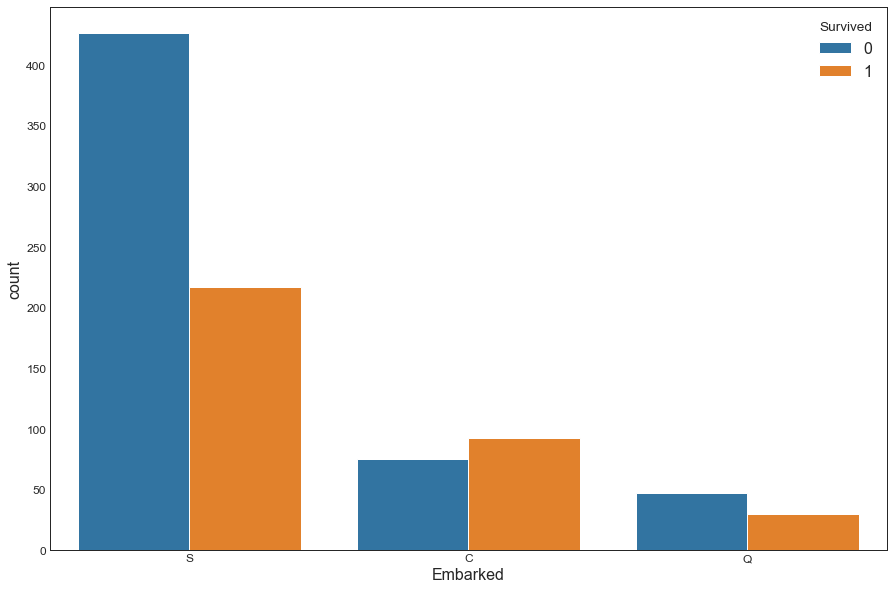

In [82]:
sns.countplot(df_train['Embarked'], hue=df_train['Survived'])

There are many passengers from Station **'S'** and also these have more deaths that Survived.  
Similarly for station **'C'**, overall passengers are less that 'S', but Survival Rate is good. And again the passengers from station **'Q'** died more than Survived.  
  
Let us check which station passengers had Cabins and which do not.

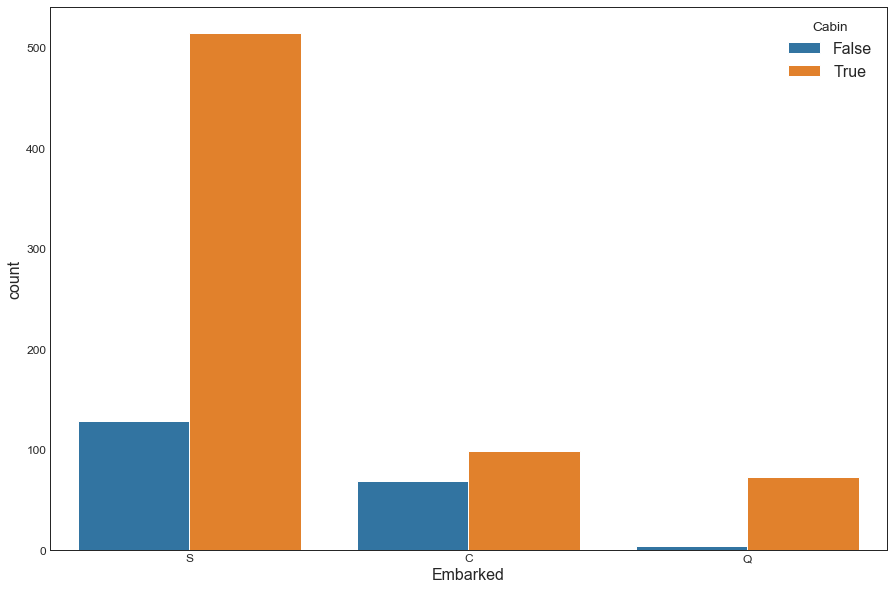

In [83]:
sns.countplot(df_train['Embarked'], hue=df_train['Cabin'].isnull())

Interesting observation!! If we compare passengers from each station, ratio of having Cabin is very less for Staion 'S' and hence more deaths while for station 'C', the same ratio is less and hence more Survivals.  
  
  
From all these graphs we can definately say that Survival dependency is distributed on almost all the fields. This can be better understood on a heatmap. 

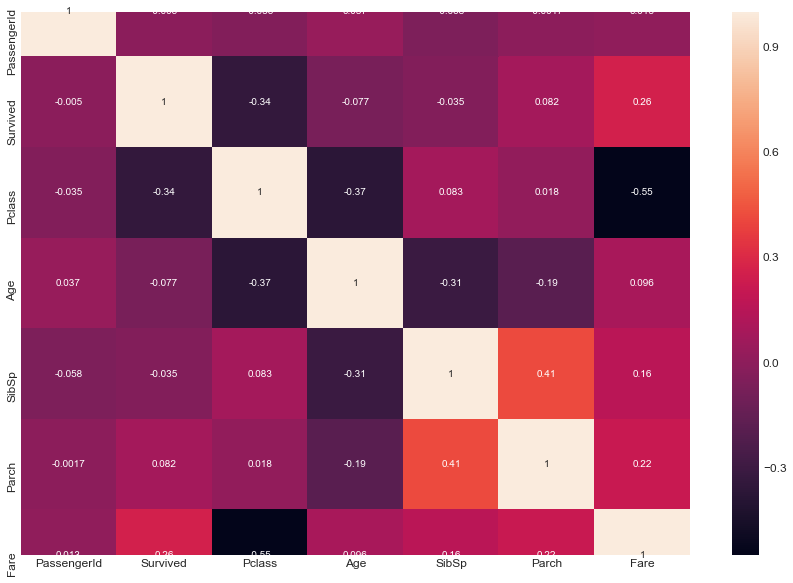

In [85]:
sns.heatmap(df_train.corr(), annot=True)
plt.show()

From above Heatmap, we can only see the numerical fields, in which Passenger Class, Age seem to have negative correlation with the Survival Rate.  
Also, we can see that there is negative correlation between the Fare and Pclass column i.e. for passenger class 1 the Fare is high as compared to passenger class 3.  
But this is not the complete picture. To understand more about the data, we need to clean it i.e. fill up the missing values with appropriate values as well as update the field format in such a way that will help us in building better model.  
  
Now, as we have 2 different sets (Train and Test), let us combine both and work on missing values.

In [168]:
# Concatinate the Train and Test Set
# Dropping the "Passenger Id" from train and test set. 
df_train.drop('PassengerId', axis=1, inplace=True)
df_test.drop('PassengerId', axis=1, inplace=True)

# Saving the target values in "y". 
y = df_train['Survived'].reset_index(drop=True)

# Concatinate both the datasets
df_data = pd.concat([df_train, df_test], sort=False).reset_index(drop=True)
# Drop Sale Price from df_data 
df_data.drop('Survived', axis=1, inplace=True)

In [169]:
# Shape of new DataFrame
df_data.shape

(1309, 10)

In [170]:
df_data.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


Now, we have total **1309** records for **10** fields.  
Also, we can say that there are missing values in fields like **'Age'** & **'Cabin'** the most and few in **'Fare'** & **'Embarked'**.    
Let us visualize the same.

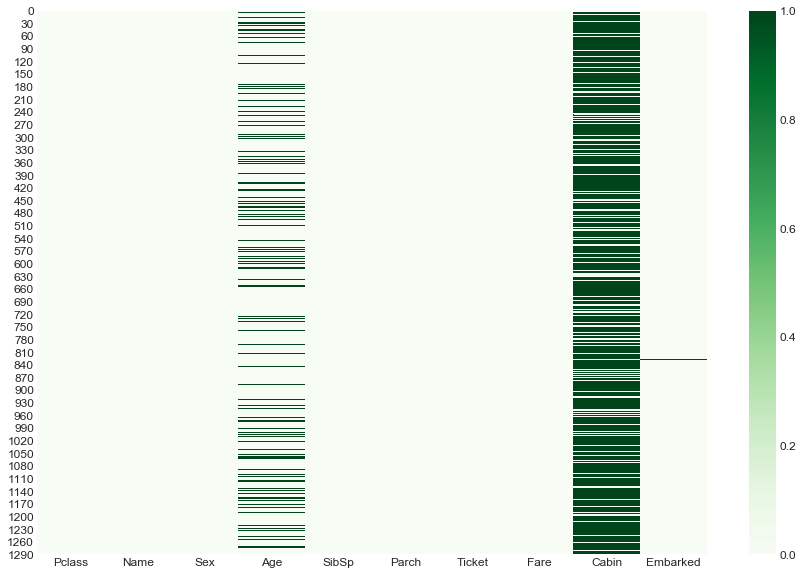

In [171]:
# Missing Data Heatmap
sns.heatmap(df_data.isnull(), cmap='Greens')

plt.show()

Let us replace the missing data in all the columns as below:  
1. **Age:** Median of all the Ages
2. **Cabin:** Let is create new feature 'hasCabin' and keep this as 1 if passenger is alloted Cabin and 0 for missing Cabin value.
3. **Embarked:** Replace the missing value with the most common value
4. **Fare:** Replace it with average value

In [193]:
# Age
df_data['Age'].fillna(df_data['Age'].median(), inplace=True)

# Embarked
df_data['Embarked'].fillna(df_data['Embarked'].mode()[0], inplace=True)

# Fare
df_data['Fare'].fillna(df_data['Fare'].mean(), inplace=True)

# Cabin
df_data['Cabin'].fillna(0, inplace=True)

#### Feature Engineering
Let us create some new fields in this data to support our model

In [208]:
# HasCabin
df_data['HasCabin'] = df_data['Cabin'].apply(lambda x: 0 if x == 0 else 1)

# Familysize
df_data['Familysize'] = df_data['SibSp'] + df_data['Parch'] + 1

# IsAlone
df_data['IsAlone'] = df_data['Familysize'].apply(lambda x: 1 if x == 1 else 0)

In [172]:
# Title: Extract title from Name
title = []

for name in df_data['Name']:
    title.append(name.split(',')[1].split('.')[0])
    
df_data['Title'] = title

In [209]:
# Create Age bin so that same age grfoup people will get together and this will become easy for model to learn
df_data['Agebins'] = pd.cut(df_data['Age'], 5)

In [215]:
# Similarly create Fare Bin
df_data['Farebins'] = pd.cut(df_data['Fare'], 5)

Now that we have created new features required, check out the fields we have in our dataFrame

In [216]:
df_data.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Title', 'HasCabin', 'Familysize', 'IsAlone',
       'Agebins', 'Farebins'],
      dtype='object')

Let us convert the Catergorical String Values into integers as most of the Machine Learning models accepts only integers as input.  
Before that let us select the features which should be selected as input for our model.

In [237]:
df_feat = df_data[['Title', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Agebins', 'Embarked', 'HasCabin', 'Familysize', 'IsAlone', 'Farebins']]

In [238]:
df_feat.head()

,Title,Pclass,SibSp,Parch,Sex,Agebins,Embarked,HasCabin,Familysize,IsAlone,Farebins
0,Mr,3,1,0,male,"(16.136, 32.102]",S,0,2,0,"(-0.512, 102.466]"
1,Mrs,1,1,0,female,"(32.102, 48.068]",C,1,2,0,"(-0.512, 102.466]"
2,Miss,3,0,0,female,"(16.136, 32.102]",S,0,1,1,"(-0.512, 102.466]"
3,Mrs,1,1,0,female,"(32.102, 48.068]",S,1,2,0,"(-0.512, 102.466]"
4,Mr,3,0,0,male,"(32.102, 48.068]",S,0,1,1,"(-0.512, 102.466]"


In [239]:
df_feat.shape

(1309, 11)

In [240]:
# Clean up rare (less than 10) titles by replacing them with 'Misc'
stat_min = 10

# Create a true false series with title name as index
title_names = (df_feat['Title'].value_counts() < stat_min)

df_feat['Title'] = df_feat['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(df_feat['Title'].value_counts())

 Mr        757
 Miss      260
 Mrs       197
 Master     61
Misc        34
Name: Title, dtype: int64


C:\Users\mdesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [247]:
# Get dummies for all the features in our feature set
all_data = pd.get_dummies(df_feat).reset_index(drop=True)
all_data.shape

(1309, 26)

In [248]:
all_data.columns

Index(['Pclass', 'SibSp', 'Parch', 'HasCabin', 'Familysize', 'IsAlone',
       'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc',
       'Sex_female', 'Sex_male', 'Agebins_(0.0902, 16.136]',
       'Agebins_(16.136, 32.102]', 'Agebins_(32.102, 48.068]',
       'Agebins_(48.068, 64.034]', 'Agebins_(64.034, 80.0]', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Farebins_(-0.512, 102.466]',
       'Farebins_(102.466, 204.932]', 'Farebins_(204.932, 307.398]',
       'Farebins_(307.398, 409.863]', 'Farebins_(409.863, 512.329]'],
      dtype='object')

In [249]:
# Let's separate the Training and Testing sets
y = df_train['Survived']

X = all_data.iloc[:len(y), :]

org_test = all_data.iloc[len(y):, :]

print(X.shape, y.shape, org_test.shape)

(891, 26) (891,) (418, 26)
